### Target:
    
    - Getting the model skeleton right.

### Results:

    - Model has 174k parameters.

    - Train Accuracy = 99.7

    - Test Accuracy = 99.34

### Analysis:

    - Simple model gradually increasing channels to 256.

    - Model is still large and overfitting.

In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [4]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [7]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [10]:
from model import Model2 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model2                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 32, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 32, 28, 28]          288                         0.17%
│    └─ReLU: 2-2                         [32, 32, 28, 28]          [32, 32, 28, 28]          --                             --
│    └─Conv2d: 2-3                       [32, 32, 28, 28]          [32, 32, 28, 28]          9,216                       5.30%
│    └─ReLU: 2-4                         [32, 32, 28, 28]          [32, 32, 28, 28]          --                             --
├─Sequential: 1-2                        [32, 32, 28, 28]          [32, 32, 14, 14]          --                

In [11]:
from utils import train, test

In [12]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.1595 Batch_id=1874 Average Loss=0.9488 Accuracy=65.69: 100%|██████████| 1875/1875 [00:39<00:00, 47.11it/s]


Test set: Average loss: 0.1634, Accuracy: 9494/10000 (94.94%)

Epoch 2


Train: Batch Loss=0.0051 Batch_id=1874 Average Loss=0.0961 Accuracy=97.08: 100%|██████████| 1875/1875 [00:30<00:00, 62.10it/s]


Test set: Average loss: 0.0640, Accuracy: 9790/10000 (97.90%)

Epoch 3


Train: Batch Loss=0.0146 Batch_id=1874 Average Loss=0.0596 Accuracy=98.08: 100%|██████████| 1875/1875 [00:31<00:00, 59.14it/s]


Test set: Average loss: 0.0438, Accuracy: 9851/10000 (98.51%)

Epoch 4


Train: Batch Loss=0.1054 Batch_id=1874 Average Loss=0.0435 Accuracy=98.60: 100%|██████████| 1875/1875 [00:30<00:00, 60.88it/s]


Test set: Average loss: 0.0501, Accuracy: 9837/10000 (98.37%)

Epoch 5


Train: Batch Loss=0.0118 Batch_id=1874 Average Loss=0.0347 Accuracy=98.88: 100%|██████████| 1875/1875 [00:33<00:00, 55.82it/s]


Test set: Average loss: 0.0295, Accuracy: 9895/10000 (98.95%)

Epoch 6


Train: Batch Loss=0.0167 Batch_id=1874 Average Loss=0.0285 Accuracy=99.09: 100%|██████████| 1875/1875 [00:32<00:00, 58.26it/s]


Test set: Average loss: 0.0352, Accuracy: 9892/10000 (98.92%)

Epoch 7


Train: Batch Loss=0.0023 Batch_id=1874 Average Loss=0.0255 Accuracy=99.19: 100%|██████████| 1875/1875 [00:30<00:00, 60.76it/s]


Test set: Average loss: 0.0323, Accuracy: 9891/10000 (98.91%)

Epoch 8


Train: Batch Loss=0.0018 Batch_id=1874 Average Loss=0.0223 Accuracy=99.27: 100%|██████████| 1875/1875 [00:32<00:00, 57.17it/s]


Test set: Average loss: 0.0293, Accuracy: 9898/10000 (98.98%)

Epoch 9


Train: Batch Loss=0.0003 Batch_id=1874 Average Loss=0.0193 Accuracy=99.42: 100%|██████████| 1875/1875 [00:30<00:00, 60.69it/s]


Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99.21%)

Epoch 10


Train: Batch Loss=0.1398 Batch_id=1874 Average Loss=0.0178 Accuracy=99.44: 100%|██████████| 1875/1875 [00:33<00:00, 56.67it/s]


Test set: Average loss: 0.0308, Accuracy: 9899/10000 (98.99%)

Epoch 11


Train: Batch Loss=0.0002 Batch_id=1874 Average Loss=0.0155 Accuracy=99.52: 100%|██████████| 1875/1875 [00:31<00:00, 59.83it/s]


Test set: Average loss: 0.0251, Accuracy: 9917/10000 (99.17%)

Epoch 12


Train: Batch Loss=0.0005 Batch_id=1874 Average Loss=0.0132 Accuracy=99.58: 100%|██████████| 1875/1875 [00:31<00:00, 59.46it/s]


Test set: Average loss: 0.0211, Accuracy: 9928/10000 (99.28%)

Epoch 13


Train: Batch Loss=0.0014 Batch_id=1874 Average Loss=0.0115 Accuracy=99.65: 100%|██████████| 1875/1875 [00:32<00:00, 57.86it/s]


Test set: Average loss: 0.0301, Accuracy: 9904/10000 (99.04%)

Epoch 14


Train: Batch Loss=0.0010 Batch_id=1874 Average Loss=0.0098 Accuracy=99.67: 100%|██████████| 1875/1875 [00:31<00:00, 60.45it/s]


Test set: Average loss: 0.0251, Accuracy: 9914/10000 (99.14%)

Epoch 15


Train: Batch Loss=0.0000 Batch_id=1874 Average Loss=0.0094 Accuracy=99.70: 100%|██████████| 1875/1875 [00:32<00:00, 56.94it/s]


Test set: Average loss: 0.0204, Accuracy: 9934/10000 (99.34%)



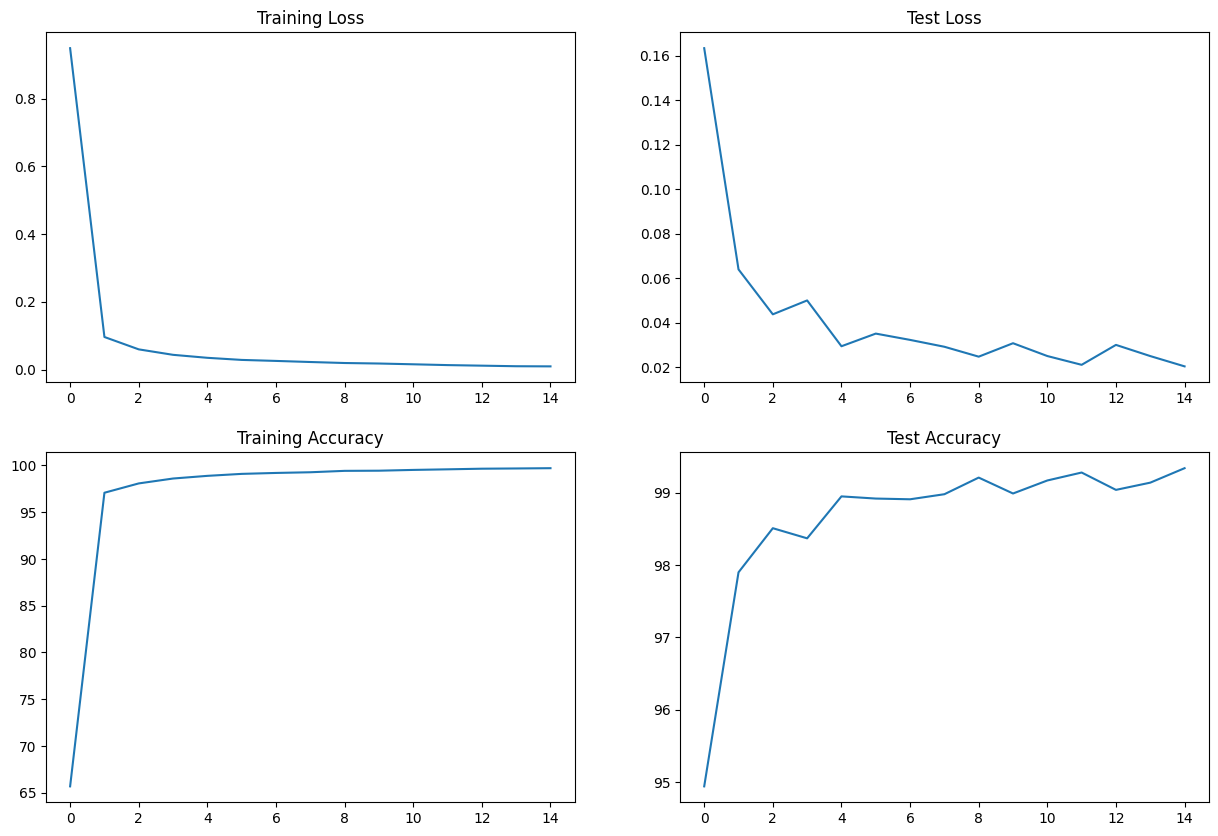

In [13]:
from utils import plot_stats
plot_stats()

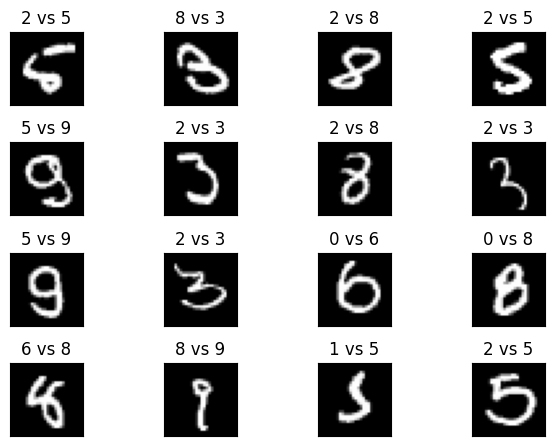

In [14]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual